In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version: working on tensorflow-macos: 2.9.0, tensorflow-metal: 0.5.0 (https://developer.apple.com/metal/tensorflow-plugin/)
print(f"TensorFlow version: {tf.__version__}") 

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

import urllib.request
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing import image

import tensorflow.keras as keras

from tensorflow.keras.applications.inception_v3 import InceptionV3 

import tensorflow_datasets as tfds 

import tensorflow_addons as tfa

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.9.0


In [3]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
anyio                         3.6.2
appdirs                       1.4.4
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.1
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.2.1
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
click                         8.1.3
comm                          0.1.2
contourpy                     1.0.7
cryptography                  39.0.0
cycler                        0.11.0
debugpy                       1.6.5
decorator

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense


model = Sequential([Dense(units=1, input_shape=[1])])
# only one line in Sequential so our neural network consists of only one layer
# many different layer types. 'Dense' means a set of fully connected neurons (most common)
# 'units=1' means only one neuron in entire neural network
# input data is only X here so 'input_shape=[1]' 


model.compile(optimizer='sgd', loss='mean_squared_error')
# sgd (stochastic gradient descent) - mathematical function that, when given the values, the previous guess, and
# the results of calculating the errors (or loss) on that guess, can then generate another one. Over time, its
# job is to minimize the loss, and by doing so bring the guessed formula closer and closer to the correct answer.

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500) 
# epochs "number of passes a training dataset takes around an algorithm" -simplilearn
# read it as 'fit the Xs to the Ys, and try it 500 times'

print(model.predict([10.0]))
# run prediction using model

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense


l0 = Dense(units=1, input_shape=[1])
model = Sequential([l0])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500) 

print(model.predict([10.0]))

print("Here is what I learned: {}".format(l0.get_weights()))
# neuron learns a weight and bias (Y = WX + B)

## Chapter 2

In [5]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

# loading fashion MNIST data
(training_images, training_labels), (test_images, test_labels) = data.load_data()

# normalizing the image - ensures every pixel is represented by a number between 0 and 1
# normalizing is important to ensure the model is trained well
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
# line 1: input layer specification: flatten takes the 2d array and turns into a line - 1d array
# line 2: middle layer (hidden layer): layer of 128 neurons
# line 3 output layer : 10 neurons as we have 10 classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
  16/1875 [..............................] - ETA: 12s - loss: 1.6607 - accuracy: 0.4434

2023-01-30 18:23:00.882799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4954 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3727 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3357 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3123 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2950 - accuracy: 0.8918


In [6]:
model.evaluate(test_images, test_labels) # test on test data

 21/313 [=>............................] - ETA: 1s - loss: 0.3393 - accuracy: 0.8839

2023-01-30 18:23:50.785303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step - loss: 0.3596 - accuracy: 0.8758


[0.35956257581710815, 0.8758000135421753]

In [ ]:
classifications = model.predict(test_images) 
print(classifications[1]) 
print(test_labels[1])

In [ ]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

# loading fashion MNIST data
(training_images, training_labels), (test_images, test_labels) = data.load_data()

# normalizing the image - ensures every pixel is represented by a number between 0 and 1
# normalizing is important to ensure the model is trained well
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
# line 1: input layer specification: flatten takes the 2d array and turns into a line - 1d array
# line 1: (28, 28) as image size is 28 * 28
# line 2: middle layer (hidden layer): layer of 128 neurons
# line 3 output layer : 10 neurons as we have 10 classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50) # discovering overfitting

In [ ]:
model.evaluate(test_images, test_labels) # test on test data

### Automatically stopping training after reaching a particular accuracy

In [ ]:
import tensorflow as tf 

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!") 
            self.model.stop_training = True
            
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

## Chapter 3

### Adding a Convolutional Neural Network (CNN) to Fashion MNIST

In [ ]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist 

(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images = training_images.reshape(60000, 28, 28, 1) # input shape needs to match Conv2D layer- 60,000 images
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# line 1: '64': number of convolutions (will learn which is the best), (3, 3): is the size of the filter
# line 1: (28, 28, 1): 28 * 28 image (same as before), Conv2D layers designed for RGB, our dataset is monochrome (1)
# line 2: pooling layer in NN. 2 * 2 pool.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images) 
print(classifications[0]) 
print(test_labels[0])

In [ ]:
model.summary()

### Building a CNN to Distinguish Between Horses and Humans

In [7]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"

file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()
# downloading the images

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300), # size of image
    class_mode='binary' # binary if two kinds of images, categorical if more than 2
)

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])
# more layers as image is much bigger than MNIST. (300*300)
# (300, 300, 3) full color so 3.
# last layer has one neuron as it is a binary classifier. 
# sigmoid function: to drive one set of values to 0 and other toward 1

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

# history = model.fit_generator(
#       train_generator,
#       epochs=15
# )

Found 1027 images belonging to 2 classes.


/Users/ammaarkhan/Desktop/Ammaar/tensorflow-test/env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()
# downloading the validation dataset

In [10]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

Found 256 images belonging to 2 classes.


/var/folders/08/1gttyz7x7yx93bdqyk3t_c4w0000gn/T/ipykernel_88027/3375392270.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15


2023-01-30 18:24:25.044940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 0.7453 - accuracy: 0.7040

2023-01-30 18:24:36.827626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 13s 362ms/step - loss: 0.7453 - accuracy: 0.7040 - val_loss: 1.2564 - val_accuracy: 0.6328
Epoch 2/15
33/33 [==============================] - 12s 363ms/step - loss: 0.2584 - accuracy: 0.9094 - val_loss: 2.4281 - val_accuracy: 0.7617
Epoch 3/15
33/33 [==============================] - 12s 354ms/step - loss: 0.1551 - accuracy: 0.9387 - val_loss: 0.8291 - val_accuracy: 0.8281
Epoch 4/15
33/33 [==============================] - 11s 336ms/step - loss: 0.1934 - accuracy: 0.9513 - val_loss: 6.6431 - val_accuracy: 0.6758
Epoch 5/15
33/33 [==============================] - 11s 322ms/step - loss: 0.0902 - accuracy: 0.9825 - val_loss: 0.4352 - val_accuracy: 0.8984
Epoch 6/15
33/33 [==============================] - 12s 353ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 1.8985 - val_accuracy: 0.8359
Epoch 7/15
33/33 [==============================] - 12s 365ms/step - loss: 0.0627 - accuracy: 0.9883 - val_loss: 2.0482 - val_accuracy: 0.8359
Epoch 8/15

### Testing the dataset with other images

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

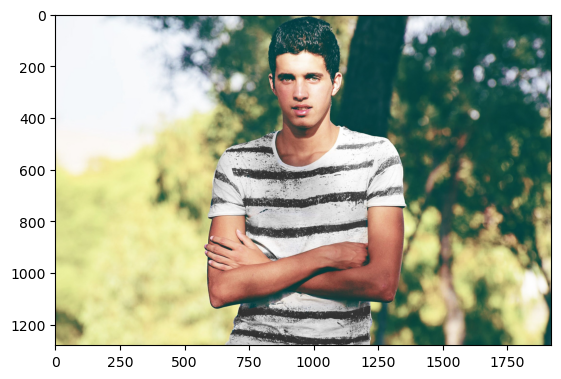

1/1 [==============================] - 0s 237ms/step
[[1.]]
[1.]
the image is of a human


2023-01-30 18:28:35.220598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
import numpy as np
from keras.preprocessing import image

path = 'test/boy-1284509_1920.jpg'

# displaying the image
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)
print(classes)
print(classes[0])
if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")
    

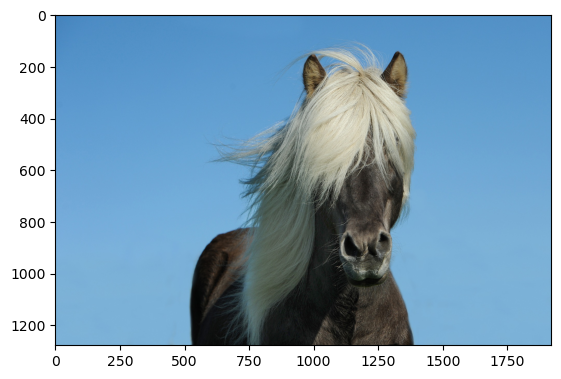

1/1 [==============================] - 0s 52ms/step
[[1.]]
[1.]
the image is of a human


In [13]:
import numpy as np
from keras.preprocessing import image

path = 'test/horse-1330690_1920.jpg'

img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")

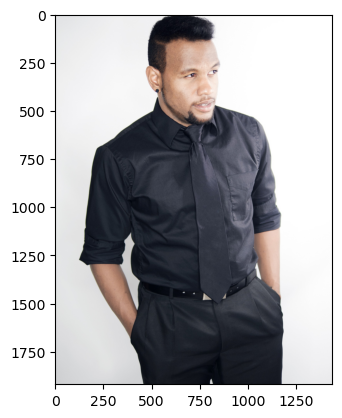

1/1 [==============================] - 0s 43ms/step
[[0.]]
[0.]
the image is of a horse


In [14]:
import numpy as np
from keras.preprocessing import image

path = 'test/business-1287044_1920.jpg'

img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")

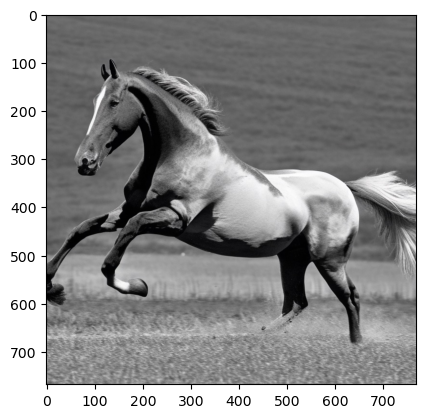

1/1 [==============================] - 0s 16ms/step
[[0.]]
[0.]
the image is of a horse


In [15]:
import numpy as np
from keras.preprocessing import image

path = 'test/out-0.jpeg'

img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")

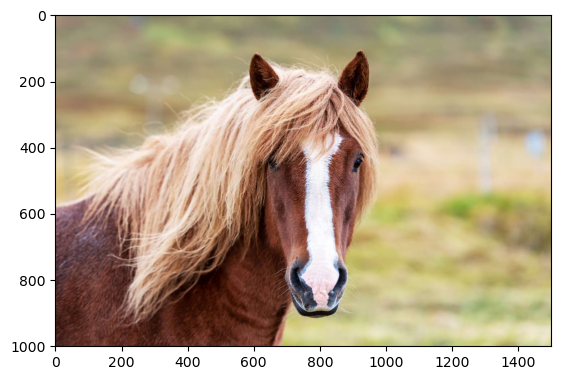

1/1 [==============================] - 0s 37ms/step
[[1.]]
the image is of a human


In [16]:
import numpy as np
from keras.preprocessing import image

path = 'test/icelandic-horse-1178169612-bb949fbfde104e5182b30c829d57de17.jpg'

img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()

img = tf.keras.utils.load_img(path, target_size=(300,300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
# print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")

### Training with Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# The following lines will rescale, rotate, shift horizontallya and vertically, shear, zoom, flip.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300), # size of image
    # batch_size=128,
    class_mode='binary' # binary if two kinds of images, categorical if more than 2
)

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])
# more layers as image is much bigger than MNIST. (300*300)
# (300, 300, 3) full color so 3.
# last layer has one neuron as it is a binary classifier. 
# sigmoid function: to drive one set of values to 0 and other toward 1

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    # batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

### Transfer Learning

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)

pre_trained_model.load_weights(weights_file)

#pre_trained_model.summary()

In [ ]:
for layer in pre_trained_model.layers: 
    layer.trainable = False
    
last_layer = pre_trained_model.get_layer('mixed7') 
print('last layer output shape: ', last_layer.output_shape) 
last_output = last_layer.output

In [ ]:
import tensorflow.keras as keras
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation 
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)    
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

# model.summary()

In [ ]:
validation_dir = 'horse-or-human/validation'
training_dir = 'horse-or-human/training'

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(150, 150), # size of image
    batch_size=20,
    class_mode='binary' # binary if two kinds of images, categorical if more than 2
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
)

In [ ]:
import numpy as np
from keras.preprocessing import image

path = 'test/business-1287044_1920.jpg'

img = tf.keras.utils.load_img(path, target_size=(150,150))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255

plt.imshow(tf.keras.utils.load_img(path))
plt.show()

image_tensor = np.vstack([x])
classes = model.predict(image_tensor, batch_size=10)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print("the image is of a human")
else:
    print("the image is of a horse")
    
print(validation_generator.class_indices)

### Multiclass Classification

In [ ]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/rps.zip"

file_name = "rps.zip"
training_dir = 'rps/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall('./')
zip_ref.close()
# downloading the images

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(150,150),
    class_mode='categorical'
)

In [ ]:
url = "https://storage.googleapis.com/learning-datasets/rps-test-set.zip"

file_name = "rps-test-set.zip"
validation_dir = 'rps-test-set/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall('./')
zip_ref.close()
# downloading the images

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

In [ ]:
model = tf.keras.models.Sequential([
    
    # Note the input shape is the desired size of the image: 
    # 150x150 with 3 bytes color
    # This is the first convolution 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN 
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, 
                    epochs=25, 
                    validation_data = validation_generator, 
                    verbose = 1
                   )

In [ ]:
import numpy as np
from keras.preprocessing import image

path = 'test/rock07-k03-103.png'

img = tf.keras.utils.load_img(path, target_size=(150,150))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255

plt.imshow(tf.keras.utils.load_img(path))
plt.show()

image_tensor = np.vstack([x])
classes = model.predict(image_tensor, batch_size=10)

print(classes)
    
print(validation_generator.class_indices)

### Dropout Regularization

In [ ]:
# reduces chances of neurons becoming overspecialized
tf.keras.layers.Dropout(0.2) 
# this will randomly drop out the specified percentage of neurons in the specified layer.

In [ ]:
#examples of use:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    
    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Dropouts help in recognizing overfitting and removes ambiguity by ensuring the network isn't overspecializing to the training data.

## Chapter 4

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds 

mnist_data = tfds.load("fashion_mnist") 

for item in mnist_data:
    print(item)


In [ ]:
mnist_train = tfds.load(name="fashion_mnist", split="train") 
assert isinstance(mnist_train, tf.data.Dataset) 
print(type(mnist_train))

In [ ]:
for item in mnist_train.take(1): 
    print(type(item)) 
    print(item.keys())
    print(item['image'])
    print(item['label'])

In [ ]:
mnist_test, info = tfds.load(name="fashion_mnist", with_info="true") 
print(info)


### Fashion MNIST example with TFDS

In [ ]:
(training_images, training_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load('fashion_mnist', 
                                                                                         split = ['train', 'test'],
                                                                                         batch_size=-1,
                                                                                         as_supervised=True))

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

### Horses or Human with TFDS

In [7]:
data = tfds.load('horses_or_humans', split='train', as_supervised=True)

train_batches = data.shuffle(100).batch(10)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# history = model.fit(train_batches, epochs=10)

In [ ]:
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)
validation_batches = val_data.batch(32)
history = model.fit(train_batches, 
                    epochs=10, 
                    validation_data=validation_batches, 
                    validation_steps=1)

### Mapping Functions for Augmentation with TFDS and TFA

In [2]:
data = tfds.load('horses_or_humans', split='train', as_supervised=True)

def augmentimages(image, label): 
    image = tf.cast(image, tf.float32)
    image = (image/255)
    image = tf.image.random_flip_left_right(image) 
    image = tfa.image.rotate(image, 40, interpolation='NEAREST') # this is imported from the tfa
    return image, label

train = data.map(augmentimages)

train_batches = train.shuffle(100).batch(32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M1


2023-02-01 14:05:54.084549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-01 14:05:54.085231: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)
validation_batches = val_data.batch(32)
history = model.fit(train_batches, 
                    epochs=10, 
                    validation_data=validation_batches, 
                    validation_steps=1)

### TFRecords

In [9]:
data, info = tfds.load("mnist", with_info=True) 
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/Users/ammaarkhan/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [10]:
filename="/Users/ammaarkhan/tensorflow_datasets/mnist/3.0.1/mnist-test.tfrecord-00000-of-00001"
raw_dataset = tf.data.TFRecordDataset(filename) 
for raw_record in raw_dataset.take(1):
    print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b"\n\x85\x03\n\xf2\x02\n\x05image\x12\xe8\x02\n\xe5\x02\n\xe2\x02\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x00\x00\x00\x00Wf\x80H\x00\x00\x01)IDAT(\x91\xc5\xd2\xbdK\xc3P\x14\x05\xf0S(v\x13)\x04,.\x82\xc5Aq\xac\xedb\x1d\xdc\n.\x12\x87n\x0e\x82\x93\x7f@Q\xb2\x08\xba\tbQ0.\xe2\xe2\xd4\xb1\xa2h\x9c\x82\xba\x8a(\nq\xf0\x83Fh\x95\n6\x88\xe7R\x87\x88\xf9\xa8Y\xf5\x0e\x8f\xc7\xfd\xdd\x0b\x87\xc7\x03\xfe\xbeb\x9d\xadT\x927Q\xe3\xe9\x07:\xab\xbf\xf4\xf3\xcf\xf6\x8a\xd9\x14\xd29\xea\xb0\x1eKH\xde\xab\xea%\xaba\x1b=\xa4P/\xf5\x02\xd7\\\x07\x00\xc4=,L\xc0,>\x01@2\xf6\x12\xde\x9c\xde[t/\xb3\x0e\x87\xa2\xe2\xc2\xe0A<\xca\xb26\xd5(\x1b\xa9\xd3\xe8\x0e\xf5\x86\x17\xceE\xdarV\xae\xb7_\xf3AR\r!I\xf7(\x06m\xaaE\xbb\xb6\xac\r*\x9b$e<\xb8\xd7\xa2\x0e\x00\xd0l\x92\xb2\xd5\x15\xcc\xae'\x00\xf4m\x08O'+\xc2y\x9f\x8d\xc9\x15\x80\xfe\x99[q\x962@CN|i\xf7\xa9!=\xd7 \xab\x19\x00\xc8\xd6\xb8\xeb\xa1\xf0\xd8l\xca\xfb]\xee\xfb]*\x9fV\xe1\x07\xb7\xc

In [12]:
feature_description = {
        'image': tf.io.FixedLenFeature([], dtype=tf.string),
        'label': tf.io.FixedLenFeature([], dtype=tf.int64),
}

def _parse_function(example_proto):
    # Parse the input `tf.Example` proto using the dictionary above 
    return tf.io.parse_single_example(example_proto, feature_description)
    
parsed_dataset = raw_dataset.map(_parse_function) 

for parsed_record in parsed_dataset.take(1):
    print((parsed_record))

{'image': <tf.Tensor: shape=(), dtype=string, numpy=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x00\x00\x00\x00Wf\x80H\x00\x00\x01)IDAT(\x91\xc5\xd2\xbdK\xc3P\x14\x05\xf0S(v\x13)\x04,.\x82\xc5Aq\xac\xedb\x1d\xdc\n.\x12\x87n\x0e\x82\x93\x7f@Q\xb2\x08\xba\tbQ0.\xe2\xe2\xd4\xb1\xa2h\x9c\x82\xba\x8a(\nq\xf0\x83Fh\x95\n6\x88\xe7R\x87\x88\xf9\xa8Y\xf5\x0e\x8f\xc7\xfd\xdd\x0b\x87\xc7\x03\xfe\xbeb\x9d\xadT\x927Q\xe3\xe9\x07:\xab\xbf\xf4\xf3\xcf\xf6\x8a\xd9\x14\xd29\xea\xb0\x1eKH\xde\xab\xea%\xaba\x1b=\xa4P/\xf5\x02\xd7\\\x07\x00\xc4=,L\xc0,>\x01@2\xf6\x12\xde\x9c\xde[t/\xb3\x0e\x87\xa2\xe2\xc2\xe0A<\xca\xb26\xd5(\x1b\xa9\xd3\xe8\x0e\xf5\x86\x17\xceE\xdarV\xae\xb7_\xf3AR\r!I\xf7(\x06m\xaaE\xbb\xb6\xac\r*\x9b$e<\xb8\xd7\xa2\x0e\x00\xd0l\x92\xb2\xd5\x15\xcc\xae'\x00\xf4m\x08O'+\xc2y\x9f\x8d\xc9\x15\x80\xfe\x99[q\x962@CN|i\xf7\xa9!=\xd7 \xab\x19\x00\xc8\xd6\xb8\xeb\xa1\xf0\xd8l\xca\xfb]\xee\xfb]*\x9fV\xe1\x07\xb7\xc9\x8b55\xe7M\xef\xb0\x04\xc0\xfd&\x89\x01<\xbe\xf9\x0

### ETL Process (Extract, Transform, Load)

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

# MODEL DEFINITION START #
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']) 
# MODEL DEFINITION END #

# EXTRACT PHASE START: raw data loaded and prepared
data = tfds.load('horses_or_humans', split='train', as_supervised=True) 
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True) 
# EXTRACT PHASE END

# TRANSFORM PHASE START: data manipulated to improve training - batching, image augmentation, mapping to feature columns
def augmentimages(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/255)
    image = tf.image.random_flip_left_right(image)
    image = tfa.image.rotate(image, 40, interpolation='NEAREST') 
    return image, label
    
train = data.map(augmentimages)
train_batches = train.shuffle(100).batch(32)
validation_batches = val_data.batch(32)
# TRANSFORM PHASE END


# LOAD PHASE START: data loaded into the neural network
history = model.fit(train_batches, epochs=10, validation_data=validation_batches, validation_steps=1)
# LOAD PHASE END

Epoch 1/10


2023-02-01 14:45:10.877529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 12s 338ms/step - loss: 0.4918 - accuracy: 0.7352 - val_loss: 291.6879 - val_accuracy: 0.4062
Epoch 2/10


2023-02-01 14:45:22.422071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-01 14:45:22.579787: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 10s 301ms/step - loss: 0.1475 - accuracy: 0.9445 - val_loss: 417.0057 - val_accuracy: 0.4375
Epoch 3/10


2023-02-01 14:45:32.631929: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 10s 287ms/step - loss: 0.0770 - accuracy: 0.9708 - val_loss: 401.2451 - val_accuracy: 0.3125
Epoch 4/10


2023-02-01 14:45:42.254180: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 10s 295ms/step - loss: 0.0446 - accuracy: 0.9825 - val_loss: 396.2703 - val_accuracy: 0.5938
Epoch 5/10


2023-02-01 14:45:52.134073: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 11s 314ms/step - loss: 0.0376 - accuracy: 0.9844 - val_loss: 562.0050 - val_accuracy: 0.5938
Epoch 6/10


2023-02-01 14:46:02.648814: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 10s 293ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 528.1543 - val_accuracy: 0.7188
Epoch 7/10


2023-02-01 14:46:12.490584: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 10s 294ms/step - loss: 0.0077 - accuracy: 0.9981 - val_loss: 660.1370 - val_accuracy: 0.6250
Epoch 8/10


2023-02-01 14:46:22.405135: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 10s 292ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 777.7947 - val_accuracy: 0.6250
Epoch 9/10


2023-02-01 14:46:32.229975: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 10s 287ms/step - loss: 2.3326e-04 - accuracy: 1.0000 - val_loss: 829.3933 - val_accuracy: 0.6562
Epoch 10/10


2023-02-01 14:46:41.866036: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


33/33 [==============================] - 10s 301ms/step - loss: 9.6021e-05 - accuracy: 1.0000 - val_loss: 864.1356 - val_accuracy: 0.6250


2023-02-01 14:46:51.939668: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Optimizing Load Phase

We can apply pipelining to reduce the idle time on the CPU and GPU/TPU. When preparing the data the GPU/TPU is idle, when training the CPU is idle. Pipelining can reduce the idle time by training on the GPU/TPU while the second batch of data is being prepared on the CPU and the cycle continues. 

### Parallelizing ETL to Improve Performance

In [23]:
train_data = tfds.load('cats_vs_dogs', split='train', with_info=True)

In [24]:
file_pattern = f'/Users/ammaarkhan/tensorflow_datasets/cats_vs_dogs/4.0.0/cats_vs_dogs-train.tfrecord*'
files = tf.data.Dataset.list_files(file_pattern)

In [25]:
train_dataset = files.interleave(
                         tf.data.TFRecordDataset,
                         cycle_length=4,
                         num_parallel_calls=tf.data.experimental.AUTOTUNE
                    )


In [28]:
def read_tfrecord(serialized_example): 
    feature_description={
        "image": tf.io.FixedLenFeature((), tf.string, ""),
        "label": tf.io.FixedLenFeature((), tf.int64, -1),
    }
    example = tf.io.parse_single_example(
        serialized_example, feature_description
    )
    image = tf.io.decode_jpeg(example['image'], channels=3) 
    image = tf.cast(image, tf.float32)
    image = image / 255
    image = tf.image.resize(image, (300,300))
    return image, example['label']

In [32]:
import multiprocessing

cores = multiprocessing.cpu_count()
print(cores)
train_dataset = train_dataset.map(read_tfrecord, num_parallel_calls=cores) 
train_dataset = train_dataset.cache()

8


In [33]:
train_dataset = train_dataset.shuffle(1024).batch(32)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [34]:
model.fit(train_dataset, epochs=10, verbose=1)

Epoch 1/10
     96/Unknown - 33s 315ms/step - loss: 0.7593 - accuracy: 0.5039

    124/Unknown - 42s 314ms/step - loss: 0.7444 - accuracy: 0.5058

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


    149/Unknown - 50s 317ms/step - loss: 0.7357 - accuracy: 0.5092

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


    157/Unknown - 53s 317ms/step - loss: 0.7335 - accuracy: 0.5102

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


    238/Unknown - 78s 314ms/step - loss: 0.7199 - accuracy: 0.5077

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


    288/Unknown - 100s 336ms/step - loss: 0.7152 - accuracy: 0.5111

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


    442/Unknown - 156s 345ms/step - loss: 0.7065 - accuracy: 0.5153

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


    466/Unknown - 163s 344ms/step - loss: 0.7062 - accuracy: 0.5143

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


    514/Unknown - 178s 341ms/step - loss: 0.7049 - accuracy: 0.5133

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


    659/Unknown - 236s 353ms/step - loss: 0.7006 - accuracy: 0.5217

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


    667/Unknown - 239s 353ms/step - loss: 0.7005 - accuracy: 0.5215

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


    685/Unknown - 245s 353ms/step - loss: 0.7006 - accuracy: 0.5208

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


    690/Unknown - 246s 353ms/step - loss: 0.7005 - accuracy: 0.5208

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


727/727 [==============================] - 259s 352ms/step - loss: 0.7002 - accuracy: 0.5200
Epoch 2/10
727/727 [==============================] - 251s 345ms/step - loss: 0.6658 - accuracy: 0.5902
Epoch 3/10
 87/727 [==>...........................] - ETA: 3:53 - loss: 0.6338 - accuracy: 0.6315

KeyboardInterrupt: 